## Reclassification

*The reclassification tools reclassify or change cell values to alternative values using a variety of methods. You can reclass one value at a time or groups of values at once using alternative fields; based on a criteria, such as specified intervals (for example, group the values into 10 intervals); or by area (for example, group the values into 10 groups containing the same number of cells). The tools are designed to allow you to easily change many values on an input raster to desired, specified, or alternative values.* -- [ESRI: Understanding reclassification](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-analyst/understanding-reclassification.htm)

Assigning new raster data values based on input raster map.


### Task: Identify water bodies on input NDVI map

*Free standing water (e.g., oceans, seas, lakes and rivers) which have a rather low reflectance in both spectral bands (at least away from shores) and thus result in very low positive or even slightly negative NDVI values,*

Water: NDVI between <-0.1, 0.1>

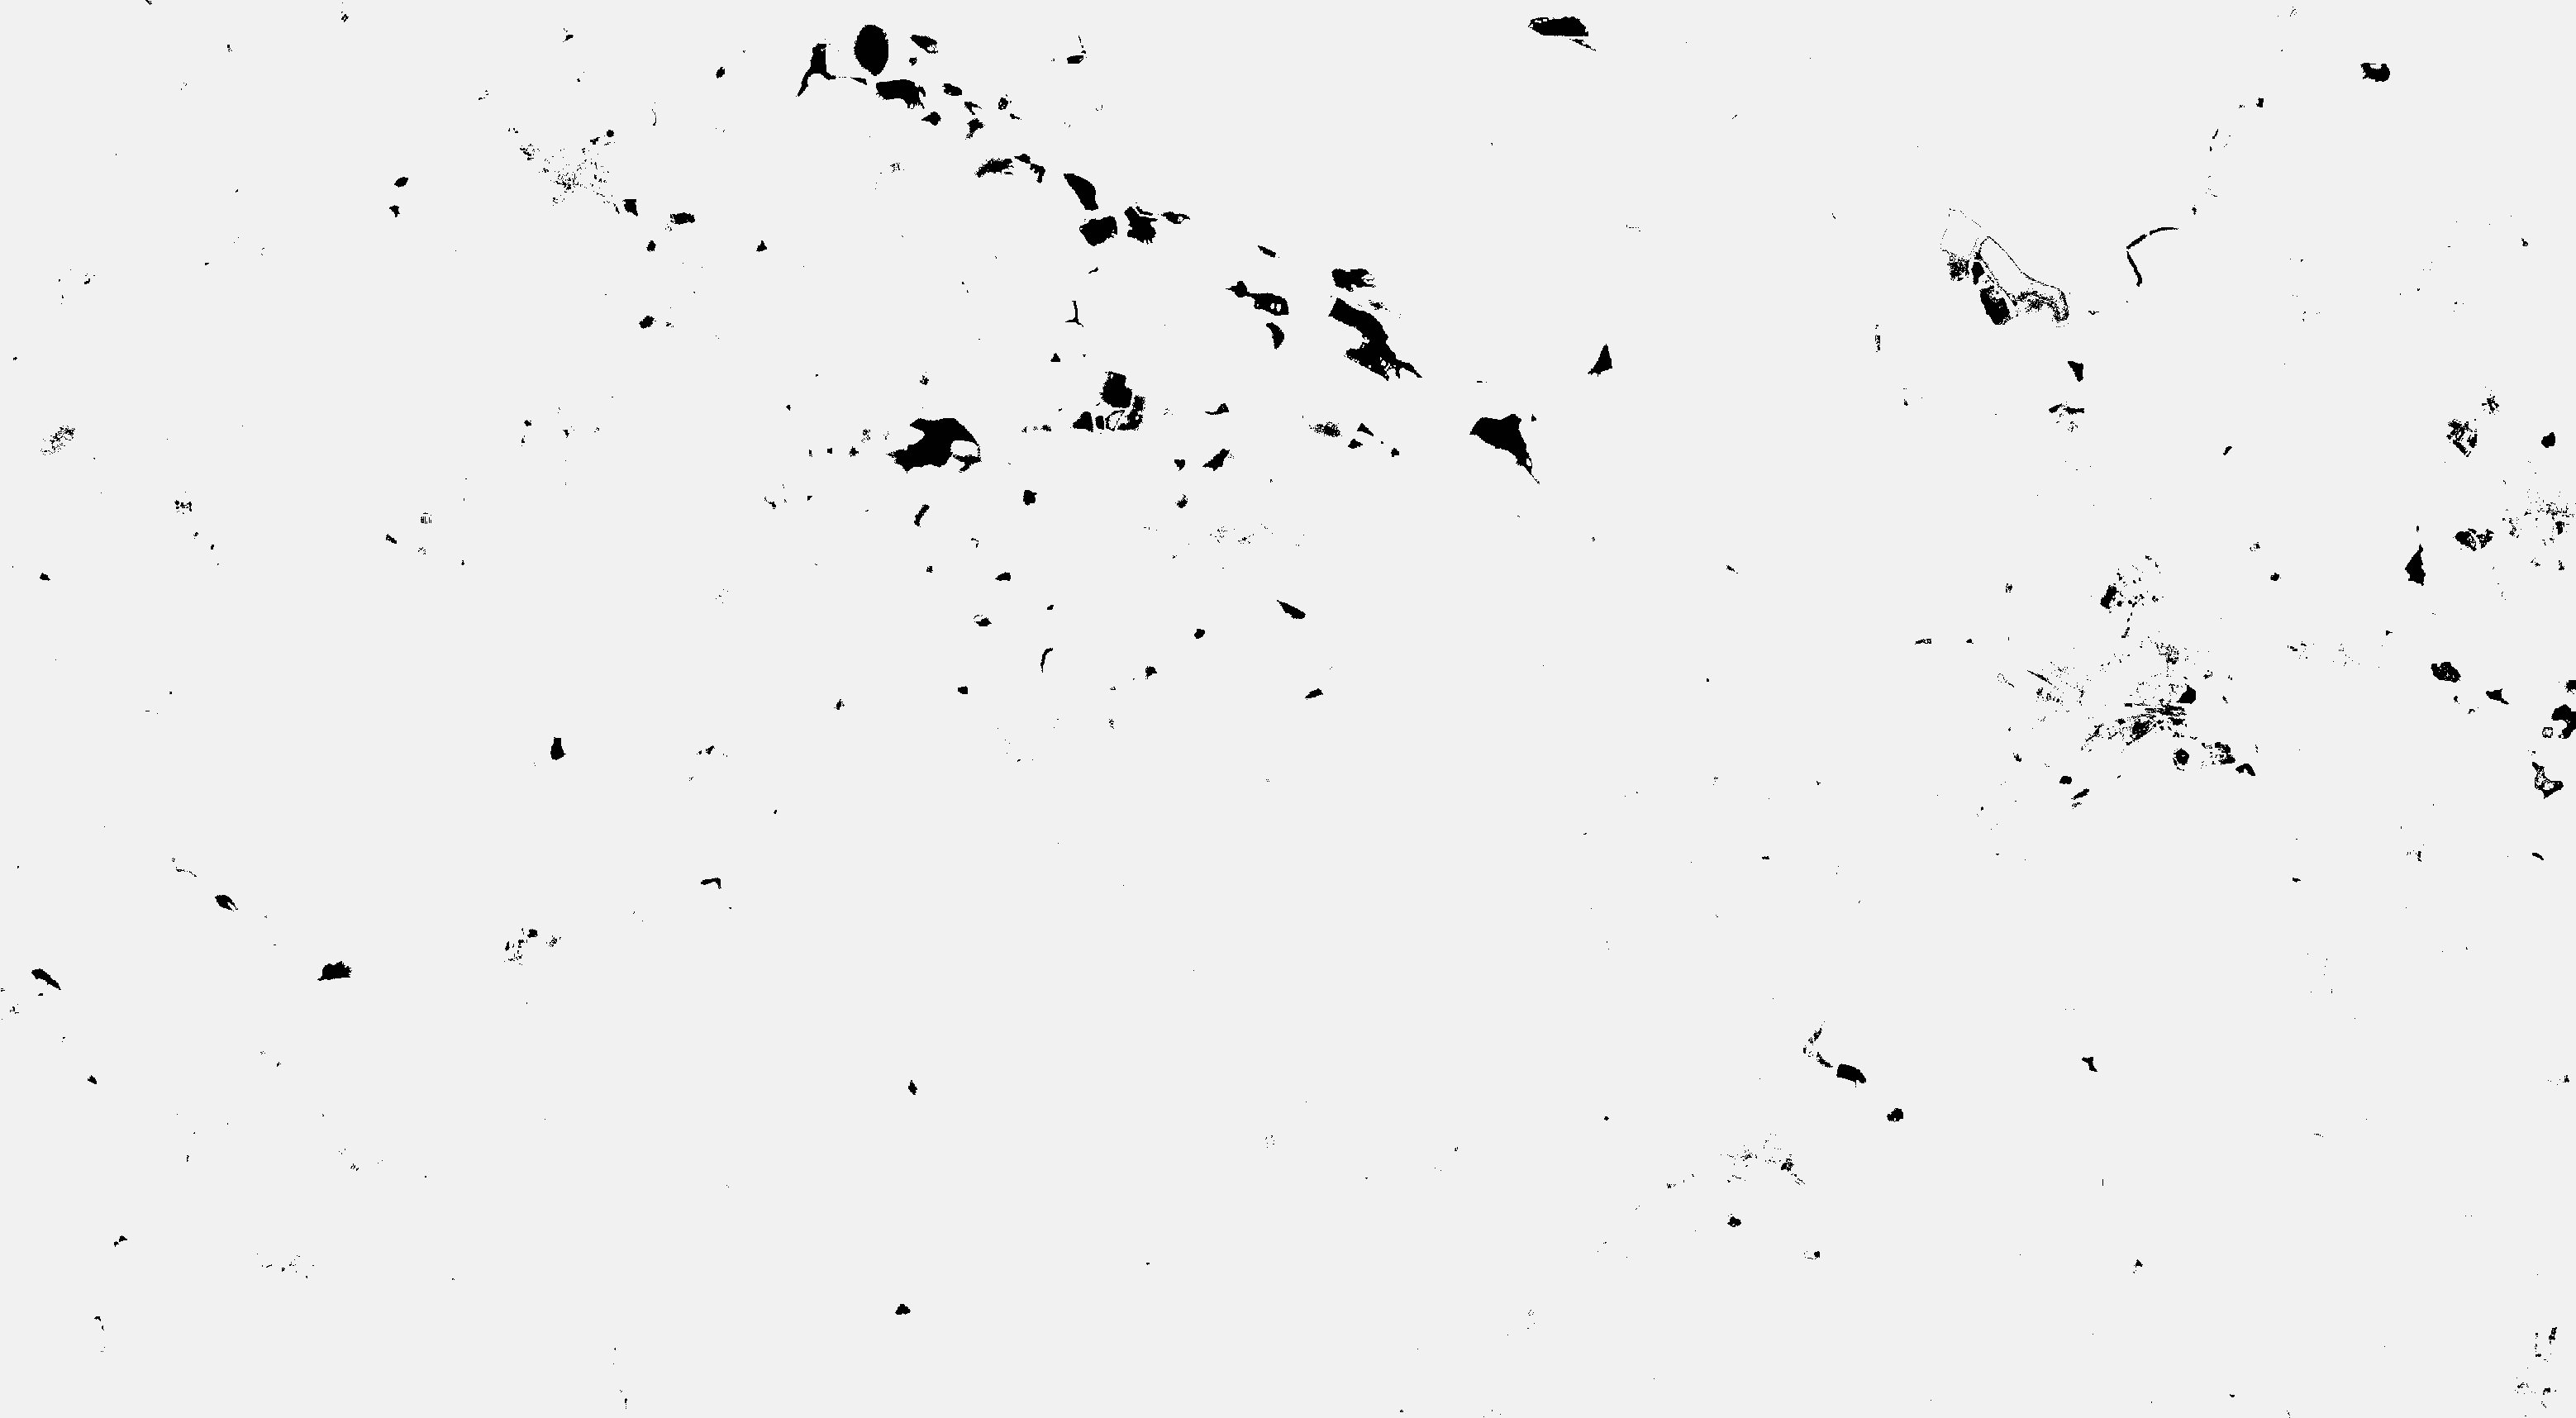

In [39]:
import copy
import rasterio
import PIL.Image

with rasterio.open('../../outputs/ndvi.tif') as ndvi:
    water = ndvi.read()

limit = 0.1
water[water<-1*limit] = -9999
water[water>limit] = -9999
water[(water>= -1*limit) & (water <= limit)] = 1
    
PIL.Image.fromarray(water[0].astype("uint8"), "L")

In [53]:
kwargs = ndvi.meta

water[water == -9999] = 0

kwargs.update(dtype="uint8")
kwargs.update(nodata=0)

with rasterio.open('../../outputs/water.tif', 'w', **kwargs) as dst:
   dst.write_band(1, water[0].astype("uint8"))

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0, 'width': 3117, 'height': 1716, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.00017964690780272554, 0.0, 14.513969421386719,
       0.0, -0.00011842547881016553, 48.866521538507754)}


Download and look at the file in QGIS: [water.tif](../../outputs/water.tif)

In [ ]:
---
<- RasterIO](02_ndvi.ipynb) | [Windowed reading and writing ->](04_windows.ipynb)